In [142]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, auc
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [143]:
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [144]:
df=pd.read_csv('/content/gdrive/MyDrive/fraudTest.csv')

Select four columns to use as features (one just be trans_date_trans)

In [145]:
df_select = df[['trans_date_trans_time','category','amt','city_pop',"is_fraud"]].copy()

In [146]:
df_select['trans_date_trans_time'] = pd.to_datetime(df_select['trans_date_trans_time'])

Create a unique variable out of trans_date.

In [147]:
df_select['time_var']=[i.minute for i in df_select['trans_date_trans_time']]

In [148]:
X = pd.get_dummies(df_select, columns=["category"]).drop(['trans_date_trans_time','is_fraud'],axis = 1)
y = df["is_fraud"]

1.) Use scikit learn preprocessing to split the data into 70/30 in out of sample

In [149]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

2.) Make three sets of training data (Oversample, Undersample and SMOTE)

Oversampling

In [150]:
ros = RandomOverSampler(random_state = 0)
X_resampled_over, y_resampled_over = ros.fit_resample(X,y)

Undersampling

In [151]:
rus = RandomUnderSampler(random_state = 0)
X_resampled_under, y_resampled_under = rus.fit_resample(X,y)

SMOTE

In [152]:
oversample=SMOTE()
X_resampled_smote, y_resampled_smote = oversample.fit_resample(X_train,y_train)

3.) Train three logistic regression models 

With over sampling

In [153]:
from sklearn.linear_model import LogisticRegression
log_reg_over = LogisticRegression().fit(X_resampled_over, y_resampled_over)

With under sampling

In [154]:
from sklearn.linear_model import LogisticRegression
log_reg_under = LogisticRegression().fit(X_resampled_under, y_resampled_under)

With SMOTE

In [155]:
from sklearn.linear_model import LogisticRegression
log_reg_smote = LogisticRegression().fit(X_resampled_smote, y_resampled_smote)

4.) Test the three models

Over sampled model

Accuracy: 0.8172281004822572


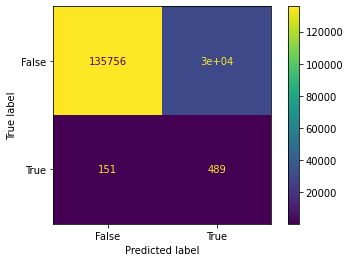

ROC-AUC: 0.7907477412449723


In [156]:
y_pred = log_reg_over.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay\
(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

# Calculate the ROC-AUC score
auc = roc_auc_score(y_test, y_pred)
print("ROC-AUC:", auc)

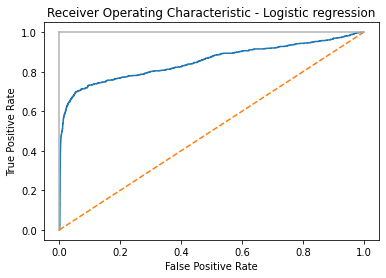

In [157]:
y_pred_proba = log_reg_smote.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.title('Receiver Operating Characteristic - Logistic regression')
plt.plot(fpr, tpr)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Under sampled model

Accuracy: 0.8209949854842966


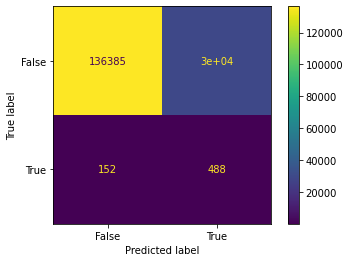

ROC-AUC: 0.7918602025578649


In [158]:
y_pred = log_reg_under.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay\
(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

# Calculate the ROC-AUC score
auc = roc_auc_score(y_test, y_pred)
print("ROC-AUC:", auc)

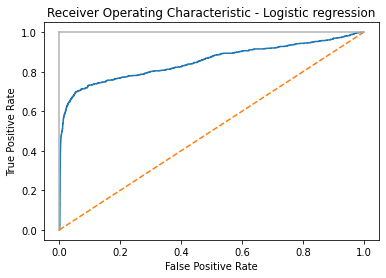

In [159]:
y_pred_proba = log_reg_smote.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.title('Receiver Operating Characteristic - Logistic regression')
plt.plot(fpr, tpr)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

SMOTE model

Accuracy: 0.8205391204203556


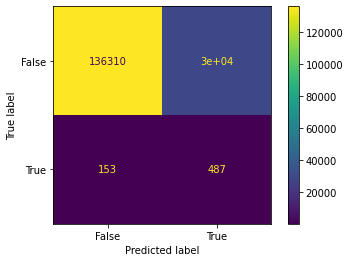

ROC-AUC: 0.7908531523218285


In [160]:
y_pred = log_reg_smote.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay\
(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

# Calculate the ROC-AUC score
auc = roc_auc_score(y_test, y_pred)
print("ROC-AUC:", auc)

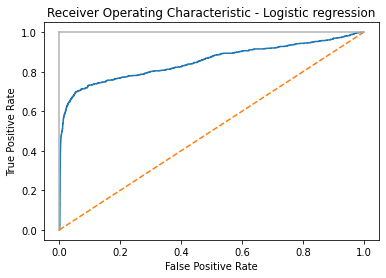

In [161]:
#define metrics
y_pred_proba = log_reg_smote.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.title('Receiver Operating Characteristic - Logistic regression')
plt.plot(fpr, tpr)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

5.) Which performed best in Out of Sample metrics?

The SMOTE seems to performs best

6.) Pick two features and plot the two classes before and after SMOTE.

Before SMOTE

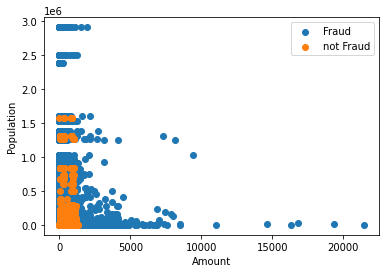

In [162]:
raw_temp = pd.concat([X_train, y_train], axis = 1)

plt.scatter(raw_temp[raw_temp['is_fraud']==0]['amt'], raw_temp[raw_temp['is_fraud']==0]['city_pop'])
plt.scatter(raw_temp[raw_temp['is_fraud']==1]['amt'], raw_temp[raw_temp['is_fraud']==1]['city_pop'])
plt.legend(['Fraud','not Fraud'])
plt.xlabel('Amount')
plt.ylabel('Population')
plt.show()

After SMOTE

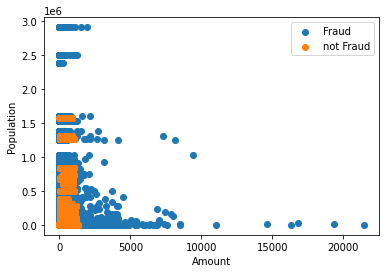

In [163]:
raw_temp = pd.concat([X_resampled_smote, y_resampled_smote], axis = 1)

plt.scatter(raw_temp[raw_temp['is_fraud']==0]['amt'], raw_temp[raw_temp['is_fraud']==0]['city_pop'])
plt.scatter(raw_temp[raw_temp['is_fraud']==1]['amt'], raw_temp[raw_temp['is_fraud']==1]['city_pop'])
plt.legend(['Fraud','not Fraud'])
plt.xlabel('Amount')
plt.ylabel('Population')
plt.show()